In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('../data/time_series_60min_singleindex.csv')
df = df[['cet_cest_timestamp', 'DE_wind_generation_actual', 'DE_solar_generation_actual', 'DE_price_day_ahead']]
df.columns = ['Timestamp', 'Wind', 'Solar', 'Price']
df.index = pd.to_datetime(df['Timestamp'], utc=True)
df = df.drop('Timestamp', axis=1)
df = df[df.index.year > 2013]
df.head()

,Wind,Solar,Price
Timestamp,,,
2014-01-01 00:00:00+00:00,8086.0,0.0,12.96
2014-01-01 01:00:00+00:00,8803.0,0.0,12.09
2014-01-01 02:00:00+00:00,8970.0,0.0,11.70
2014-01-01 03:00:00+00:00,8510.0,0.0,11.66
2014-01-01 04:00:00+00:00,8360.0,0.0,11.35


In [148]:
daily_df = df.groupby(df.index.date).agg({'Wind': 'sum', 'Solar': 'sum', 'Price': 'first'})
daily_df.index = pd.to_datetime(daily_df.index)
daily_df.head()

,Wind,Solar,Price
2014-01-01,220085.0,30493.0,12.96
2014-01-02,304166.0,13680.0,7.02
2014-01-03,340639.0,23510.0,25.61
2014-01-04,260828.0,15227.0,9.84
2014-01-05,175812.0,18067.0,14.69


In [149]:
daily_df = daily_df.fillna(daily_df.rolling(7, min_periods=1).median())

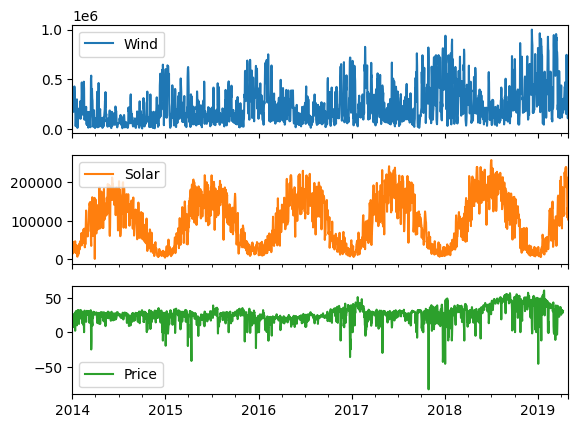

In [150]:
daily_df[['Wind', 'Solar', 'Price']].plot(subplots=True);

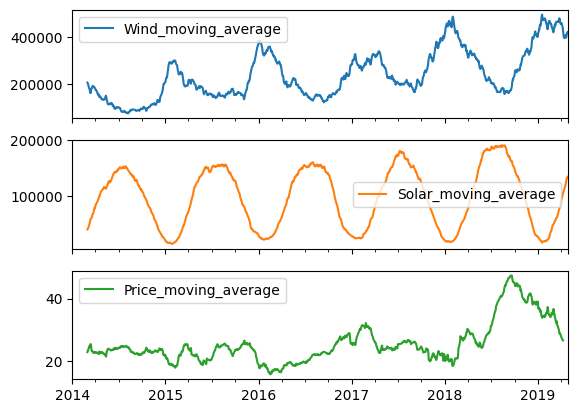

In [151]:
window = 60

daily_df['Wind_moving_average'] = daily_df['Wind'].rolling(window=window).mean()
daily_df['Solar_moving_average'] = daily_df['Solar'].rolling(window=window).mean()
daily_df['Price_moving_average'] = daily_df['Price'].rolling(window=window).mean()

daily_df[['Wind_moving_average', 'Solar_moving_average', 'Price_moving_average']].plot(subplots=True);

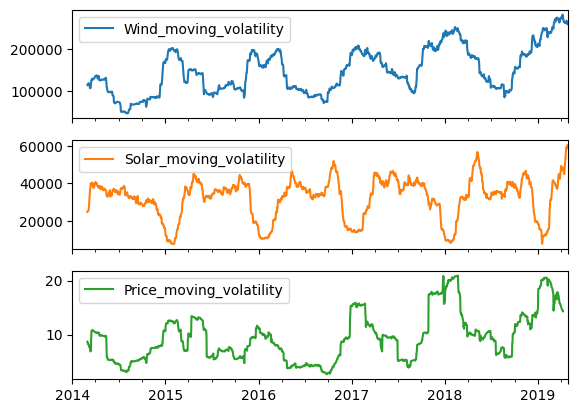

In [152]:
daily_df['Wind_moving_volatility'] = daily_df['Wind'].rolling(window=window).apply(lambda x: np.std(x))
daily_df['Solar_moving_volatility'] = daily_df['Solar'].rolling(window=window).apply(lambda x: np.std(x))
daily_df['Price_moving_volatility'] = daily_df['Price'].rolling(window=window).apply(lambda x: np.std(x))

daily_df[['Wind_moving_volatility', 'Solar_moving_volatility', 'Price_moving_volatility']].plot(subplots=True);

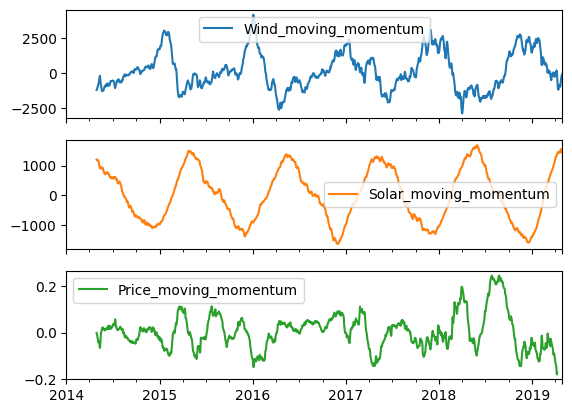

In [153]:
daily_df['Wind_moving_momentum'] = daily_df['Wind_moving_average'].rolling(window=window).apply(lambda x: np.mean(np.diff(x)))
daily_df['Solar_moving_momentum'] = daily_df['Solar_moving_average'].rolling(window=window).apply(lambda x: np.mean(np.diff(x)))
daily_df['Price_moving_momentum'] = daily_df['Price_moving_average'].rolling(window=window).apply(lambda x: np.mean(np.diff(x)))

daily_df[['Wind_moving_momentum', 'Solar_moving_momentum', 'Price_moving_momentum']].plot(subplots=True);

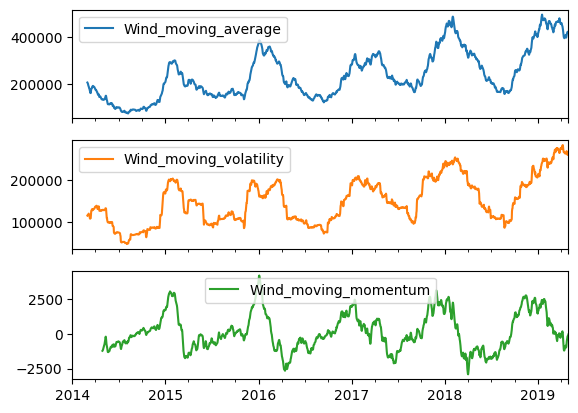

,Wind_moving_average,Wind_moving_volatility,Wind_moving_momentum
Wind_moving_average,1.000000,0.941595,0.453306
Wind_moving_volatility,0.941595,1.000000,0.440412
Wind_moving_momentum,0.453306,0.440412,1.000000


In [154]:
daily_df[['Wind_moving_average', 'Wind_moving_volatility', 'Wind_moving_momentum']].plot(subplots=True)
plt.show()
daily_df[['Wind_moving_average', 'Wind_moving_volatility', 'Wind_moving_momentum']].corr()

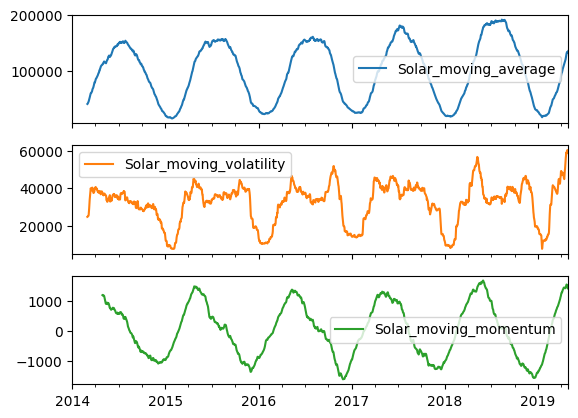

,Solar_moving_average,Solar_moving_volatility,Solar_moving_momentum
Solar_moving_average,1.000000,0.689025,0.491931
Solar_moving_volatility,0.689025,1.000000,0.485652
Solar_moving_momentum,0.491931,0.485652,1.000000


In [155]:
daily_df[['Solar_moving_average', 'Solar_moving_volatility', 'Solar_moving_momentum']].plot(subplots=True)
plt.show()
daily_df[['Solar_moving_average', 'Solar_moving_volatility', 'Solar_moving_momentum']].corr()

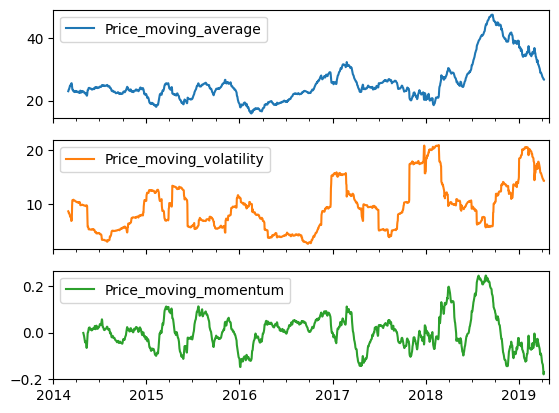

,Price_moving_average,Price_moving_volatility,Price_moving_momentum
Price_moving_average,1.000000,0.200324,0.365839
Price_moving_volatility,0.200324,1.000000,-0.349825
Price_moving_momentum,0.365839,-0.349825,1.000000


In [156]:
daily_df[['Price_moving_average', 'Price_moving_volatility', 'Price_moving_momentum']].plot(subplots=True)
plt.show()
daily_df[['Price_moving_average', 'Price_moving_volatility', 'Price_moving_momentum']].corr()